In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('age-of-electoral-democracy-lexical.csv')

In [29]:
df = df.rename(columns={
    'Entity': 'Country',
    'Age of electoral democracy': 'Age'
})

In [30]:
df = df.drop(columns=['Code'])

In [31]:
df.dtypes

Country    object
Year        int64
Age        object
dtype: object

In [32]:
df_brazil = df[df['Country'] == "Brazil"].reset_index(drop=True)

In [33]:
df_brazil['Status'] = df_brazil['Age']

In [34]:
replacable_ages = [
    'non-electoral autocracy',
    'multi-party autocracy without elected executive',
    'one-party autocracy',
    'multi-party autocracy',
    'exclusive democracy'
]

for age in replacable_ages:
    df_brazil['Age'] = df_brazil['Age'].replace(age, 0)

In [35]:
numerical_statuses = [str(n) for n in range(1, 41)]

for status in numerical_statuses:
    df_brazil['Status'] = df_brazil['Status'].replace(status, 'electoral democracy')

In [36]:
df_brazil.dtypes

Country    object
Year        int64
Age        object
Status     object
dtype: object

In [37]:
df_brazil['Age'] = df_brazil['Age'].astype(int)

In [38]:
df_brazil.dtypes

Country    object
Year        int64
Age         int64
Status     object
dtype: object

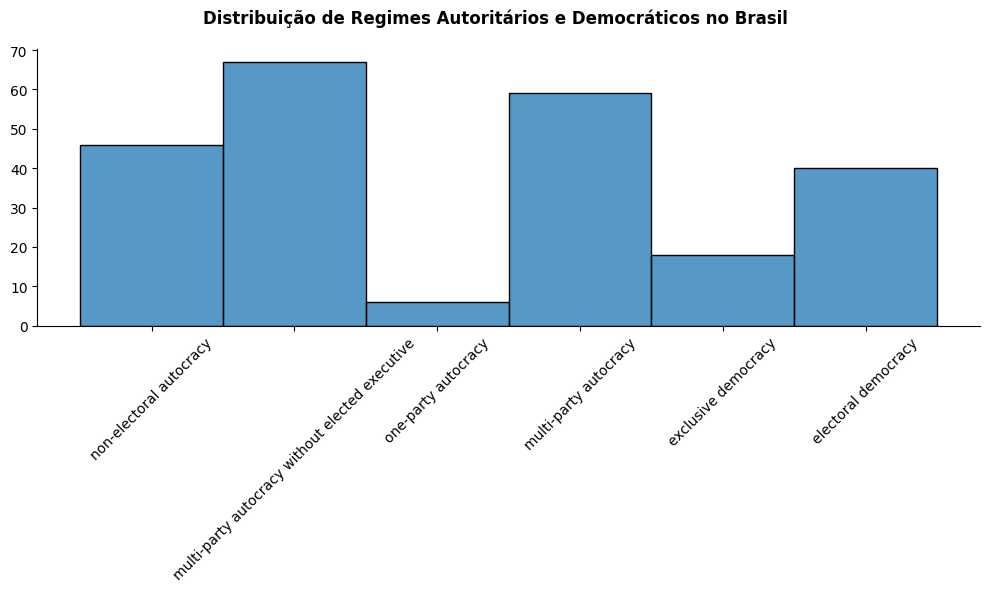

In [39]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df_brazil['Status'])

plt.suptitle('Distribuição de Regimes Autoritários e Democráticos no Brasil', fontweight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
#plt.savefig('', dpi=300, bbox_inches='tight')
plt.show()